In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("report.csv")

In [3]:
data["buf_size_bytes"] = data["buf_size_bytes"] / 1024
data["buf_size_bytes"] = data["buf_size_bytes"].astype(int)
cols = data.columns.values
cols[1] = "buf_size_kb"
data.columns = cols

In [4]:
data["host_time_ms"] = data["host_time_ms"] * 1000
data["host_time_ms"] = data["host_time_ms"].astype(int)
cols = data.columns.values
cols[2] = "host_time_us"
data.columns = cols

In [5]:
data.head()

,device_type,buf_size_kb,host_time_us,kernel_time_ms
0,iGPU,1,2289,0
1,iGPU,1,268,0
2,iGPU,1,200,0
3,iGPU,1,323,0
4,iGPU,1,293,0


In [9]:
maxes = data.groupby(["buf_size_kb", "device_type"]).host_time_us.transform('max')
res_data = data[~(data['host_time_us'] == maxes)]

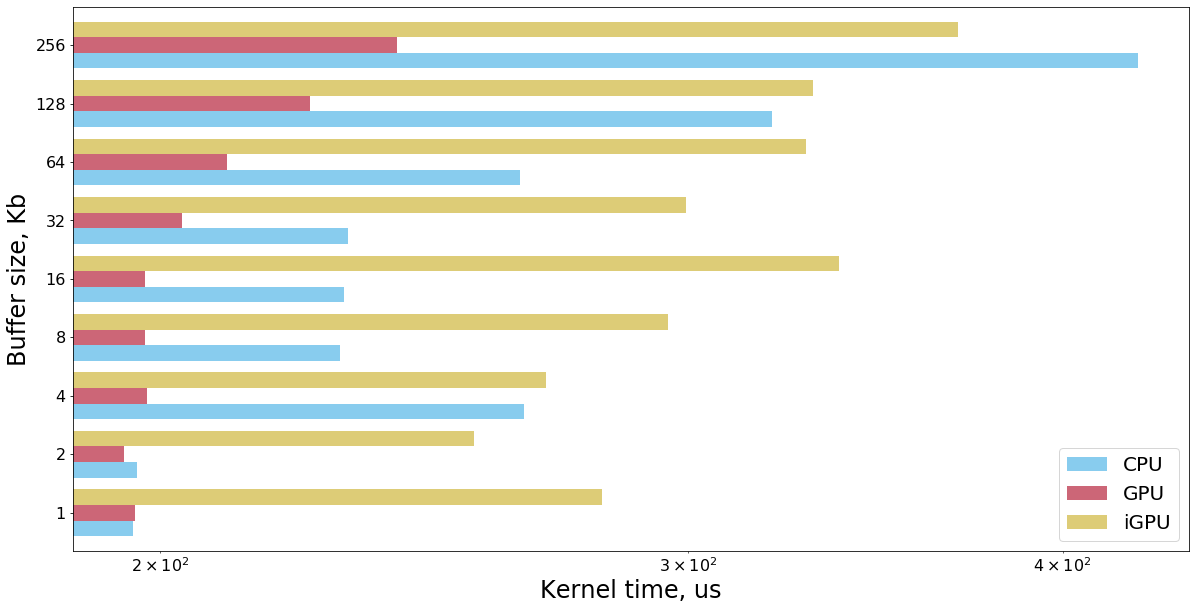

In [12]:
ax = res_data.groupby(["buf_size_kb", "device_type"]).host_time_us.mean().unstack().plot(kind='barh', legend=True, color=['#88CCEE', '#CC6677', '#DDCC77'], logx=True, figsize=(20,10), fontsize=16, width=0.8)
ax.set_xlabel('Kernel time, us', fontdict={'fontsize':24})
ax.set_ylabel('Buffer size, Kb', fontdict={'fontsize':24})
ax.legend(fontsize=20)
# ax.set_xticks([1, 10, 100, 1000])